## K-Means
> 选择合适的k值,利用K-Means做聚类

### 基本原理

Kmeans是无监督学习的代表，没有所谓的Y。主要目的是分类，分类的依据就是样本之间的距离。比如要分为K类。步骤是：

1. 随机选取K个点。
2. 计算每个点到K个质心的距离，分成K个簇。
3. 计算K个簇样本的平均值作新的质心
4. 循环2、3
5. 位置不变，距离完成

### 距离
Kmeans的基本原理是计算距离。一般有三种距离可选：

* 欧氏距离
d(x,u)=∑i=1n(xi−μi)2−−−−−−−−−−−√
* 曼哈顿距离
d(x,u)=∑i=1n(|xi−μ|)
* 余弦距离

### inertia
每个簇内到其质心的距离相加，叫inertia。

各个簇的inertia相加的和越小，即簇内越相似。（但是k越大inertia越小，追求k越大对应用无益处）


[K-Means](https://www.cnblogs.com/pinard/p/6169370.html)
[sklearn文档-svm](https://scikit-learn.org/dev/modules/svm.html#svm)

In [ ]:
## 模拟数据
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=500, # 500个样本
                  n_features=2, # 每个样本2个特征
                  centers=4, # 4个中心
                  random_state=1 #控制随机性
)

In [ ]:
# 查看数据， 画出图像

color = ['red', 'pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(4):
    axi1.scatter(X[y==i, 0], X[y==i,1],
               marker='o',
               s=8,
               c=color[i]
               )
plt.show()

In [ ]:
# 使用KMeans类建模：

from sklearn.cluster import KMeans
n_clusters=3
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(X)

In [ ]:
centroid = cluster.cluster_centers_ # 查看质心
print(centroid)

In [ ]:
inertia=cluster.inertia_
print(inertia)

In [ ]:
y_pred = cluster.predict(X)
color=['red','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(X[y_pred==i, 0], X[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')

用Calinski-Harabasz Index评估的聚类分数:


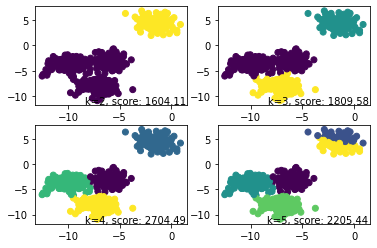

In [8]:
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

for index, k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size = 200, random_state=9).fit_predict(X)
    score= metrics.cluster.calinski_harabasz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')
plt.show()